# Myanmar Coup Fetality Dataset

source: [aappb](https://aappb.org/?cat=109)

In [73]:
import camelot
import numpy as np
import matplotlib.pyplot as plt

## Load data from pdf file

In [74]:
tables = camelot.read_pdf("Recent-Fatality-list-updated-on-June-4-2021-English.pdf", pages='1-end')
tables.n

53

In [75]:
dataset = tables[0].df

for tableIndex in range(1, tables.n):
    dataset = dataset.append(tables[tableIndex].df, ignore_index=True)

In [76]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of \nIncident,Deceased \nDate,Organization,Place of \nIncidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko \nNyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 street, \nbetween 37 and \n38 street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old \nKo Na Pwar ..."
2,2,Mya Thwate Thwate \nKhaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, \nLower \nPaunglaung \nHydro P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-\ncoup protests i..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, \nTanintharyi \nRegion,",Toe Chal Ward,Myeik,Tanintharyi \nRegion,"On 15 February evening, 18-year \nold Maung Na..."
4,4,Thet Naing Win @ \nMin Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar road, \nMandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid \nturned violen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,San Po,F,46,Unknown Name,29-May-21,30-May-21,Civilian,Chaungwapyin \nVillage,"Thinbawsite \nvillage group, \nChaungwapyin \n...",‌\nLaunglon,Tanintharyi \nRegion,"Two women, who were arrested \nwith gunshot in..."
788,788,Aye Cho,F,29,Unknown Name,29-May-21,30-May-21,Civilian,Chaungwapyin \nVillage,"Thinbawsite \nvillage group, \nChaungwapyin \n...",‌\nLaunglon,Tanintharyi \nRegion,"Two women, who were arrested \nwith gunshot in..."
789,789,Wai Linn Aung,M,29,Unknown Name,30-May-21,30-May-21,Civilian,On The Road,Lawpita village,Loikaw,Kayah Region,"On the night of May 30, he was \nshot dead in ..."
790,790,Di Ko,M,19,Unknown Name,02-Jun-21,02-Jun-21,Civilian,,Mongpai (Mobye) Pekon,,Shan State,"On the night of June 2, a 19 year-\nold youth ..."


## Cleanup data
Cleanup newline (\n)

In [77]:
dataset = dataset.applymap(lambda str: str.replace('\n', ''))
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Adress,Township,States/Regions Remarks,
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 street, between 37 and 38 street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region,",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,San Po,F,46,Unknown Name,29-May-21,30-May-21,Civilian,Chaungwapyin Village,"Thinbawsite village group, Chaungwapyin Village",‌Launglon,Tanintharyi Region,"Two women, who were arrested with gunshot inju..."
788,788,Aye Cho,F,29,Unknown Name,29-May-21,30-May-21,Civilian,Chaungwapyin Village,"Thinbawsite village group, Chaungwapyin Village",‌Launglon,Tanintharyi Region,"Two women, who were arrested with gunshot inju..."
789,789,Wai Linn Aung,M,29,Unknown Name,30-May-21,30-May-21,Civilian,On The Road,Lawpita village,Loikaw,Kayah Region,"On the night of May 30, he was shot dead in an..."
790,790,Di Ko,M,19,Unknown Name,02-Jun-21,02-Jun-21,Civilian,,Mongpai (Mobye) Pekon,,Shan State,"On the night of June 2, a 19 year-old youth wa..."


Fix column names

In [78]:
header = dataset.head(1).to_numpy()[0]
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Adress', 'Township', 'States/Regions Remarks', ''],
      dtype=object)

In [79]:
header[-4] = 'Home Address'
header[-2] = 'States/Regions'
header[-1] = 'Remarks'
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [80]:
dataset.columns = header
dataset = dataset.drop(index=0)
dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 street, between 37 and 38 street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region,",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,1,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,San Po,F,46,Unknown Name,29-May-21,30-May-21,Civilian,Chaungwapyin Village,"Thinbawsite village group, Chaungwapyin Village",‌Launglon,Tanintharyi Region,"Two women, who were arrested with gunshot inju..."
788,788,Aye Cho,F,29,Unknown Name,29-May-21,30-May-21,Civilian,Chaungwapyin Village,"Thinbawsite village group, Chaungwapyin Village",‌Launglon,Tanintharyi Region,"Two women, who were arrested with gunshot inju..."
789,789,Wai Linn Aung,M,29,Unknown Name,30-May-21,30-May-21,Civilian,On The Road,Lawpita village,Loikaw,Kayah Region,"On the night of May 30, he was shot dead in an..."
790,790,Di Ko,M,19,Unknown Name,02-Jun-21,02-Jun-21,Civilian,,Mongpai (Mobye) Pekon,,Shan State,"On the night of June 2, a 19 year-old youth wa..."


Drop total number row

In [81]:
dataset = dataset.drop(index=len(dataset))

Expand combined row

In [82]:
def extract_number_from_string(str):
    numbers = [int(s) for s in str.split() if s.isdigit()]

    if len(numbers) > 0:
        return numbers[0]
    return ''

combined_row = dataset['Name'].map(extract_number_from_string)

for rowIndex in combined_row[combined_row != ''].index: 
    for i in range(combined_row[rowIndex] - 1):
        dataset = dataset.append(dataset.iloc[rowIndex])

dataset


,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,08-Feb-21,08-Feb-21,Civilian,Mandalay,"75 street, between 37 and 38 street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,unknown,09-Feb-21,19-Feb-21,Civilian,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power P...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region,",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,1,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar road, Mandalay City",near 41 street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,652,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
652,652,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
652,652,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
652,652,Kaung Kyaw Tun,M,19,Unknown Name,09-Apr-21,09-Apr-21,Student,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."


Drop unused columns

In [83]:
dataset = dataset.drop(columns=['No.','Name',"Father's name", 'Home Address', 'Deceased Date', 'Place of Incidents', 'Township', 'States/Regions'])
dataset

,Sex,Age,Date of Incident,Organization,Remarks
1,M,32,08-Feb-21,Civilian,"In another incident, 32 year old Ko Na Pwar (a..."
2,F,19,09-Feb-21,Civilian,"On February 9, peaceful anti-coup protests in ..."
3,M,18,15-Feb-21,Civilian,"On 15 February evening, 18-year old Maung Nay ..."
4,M,37,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
5,M,16,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."


## Explore data

In [84]:
dataset.describe()

,Sex,Age,Date of Incident,Organization,Remarks
count,845,845,845,845,845
unique,3,63,96,66,272
top,M,,27-Mar-21,Civilian,
freq,763,171,162,634,301


In [85]:
dataset['Sex'].value_counts()

M    763
F     49
      33
Name: Sex, dtype: int64

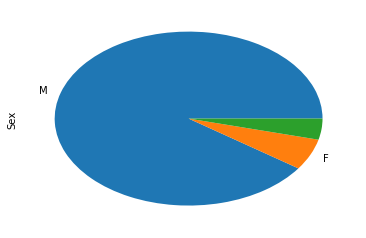

In [86]:
dataset['Sex'].value_counts().plot(kind='pie')


In [87]:
dataset['Age'].value_counts()

      171
19     95
20     35
30     31
25     27
     ... 
54      1
68      1
70      1
9       1
6       1
Name: Age, Length: 63, dtype: int64

(array([  2., 168., 216., 151.,  90.,  33.,  11.,   3.,   0.,   0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

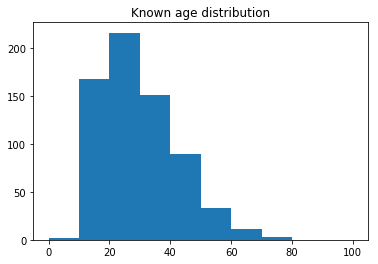

In [88]:
ages = dataset['Age'].to_numpy()

fig, ax = plt.subplots()
ax.set_title('Known age distribution')
ax.hist(ages[ages != ''].astype(np.int), range=[0, 100])

In [89]:
dataset['Organization'].value_counts()

Civilian                   634
Student                    114
                            17
Teacher                      7
Engineer                     3
                          ... 
Student (ABSFU, Monywa)      1
Civilian Servant             1
CDM Police                   1
Tourist Guide                1
Activist                     1
Name: Organization, Length: 66, dtype: int64

In [90]:
def conbine_organization(org):
    lower_org = org.lower()
    if 'student' in lower_org or 'b.a' in lower_org:
        return 'Student'
    elif 'doctor' in lower_org or 'nurse' in lower_org:
        return 'Doctor/Nurse'
    elif 'nld' in lower_org:
        return 'NLD'
    elif 'engineer' in lower_org:
        return 'Engineer'
    elif 'teacher' in lower_org:
        return 'Teacher'
    elif 'bank staff' in lower_org or 'kbz' in lower_org:
        return 'Bank Staff'
    elif 'servant' in lower_org or 'department' in lower_org:
        return 'Civil Servant'
    elif 'civilian' in lower_org:
        return 'Civilian'
    elif 'activist' in lower_org:
        return 'Activist'
    else:
        return org

grouped_organizations = dataset['Organization'].apply(conbine_organization)
grouped_organizations.value_counts()

Civilian                                  636
Student                                   133
                                           17
Teacher                                     8
Doctor/Nurse                                5
Engineer                                    5
Bank Staff                                  4
Civil Servant                               4
Poet                                        3
NLD                                         3
Worker Association                          2
Activist                                    2
Former Political Prisoner                   1
Former Police                               1
Security of Wesali hospital                 1
Women for Justice (WJ)                      1
Worker                                      1
Car Workshop                                1
Former Hundred Household Administrator      1
Futsal Goalkeeper                           1
Former Military Officer                     1
Firefighter                       

In [91]:
grouped_organizations_counts = grouped_organizations.value_counts()

def cut_other_organizations(org):
    if grouped_organizations_counts[org] < 4:
        return 'Other'
    return org

grouped_organizations = grouped_organizations.apply(cut_other_organizations)
grouped_organizations.value_counts()

Civilian         636
Student          133
Other             33
                  17
Teacher            8
Engineer           5
Doctor/Nurse       5
Civil Servant      4
Bank Staff         4
Name: Organization, dtype: int64

In [92]:
dataset['Organization'] = grouped_organizations
dataset

,Sex,Age,Date of Incident,Organization,Remarks
1,M,32,08-Feb-21,Civilian,"In another incident, 32 year old Ko Na Pwar (a..."
2,F,19,09-Feb-21,Civilian,"On February 9, peaceful anti-coup protests in ..."
3,M,18,15-Feb-21,Civilian,"On 15 February evening, 18-year old Maung Nay ..."
4,M,37,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
5,M,16,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."


## Export JSON

In [93]:
dataset.columns = ['sex', 'age', 'dateOfIncident', 'organization', 'remarks']
dataset

,sex,age,dateOfIncident,organization,remarks
1,M,32,08-Feb-21,Civilian,"In another incident, 32 year old Ko Na Pwar (a..."
2,F,19,09-Feb-21,Civilian,"On February 9, peaceful anti-coup protests in ..."
3,M,18,15-Feb-21,Civilian,"On 15 February evening, 18-year old Maung Nay ..."
4,M,37,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
5,M,16,20-Feb-21,Civilian,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."
652,M,19,09-Apr-21,Student,"Earlier on April 9, before dawn, the terrorist..."


In [94]:
dataset.to_csv('recent-fatality.csv', index=False)